In [1]:
import pandas as pd
#import yfinance as yf
import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.api import SimpleExpSmoothing

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import os
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import math

from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime, timedelta
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
#from common.utils import load_data, mape

In [5]:
from google.colab import drive

In [6]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [7]:
cd /content/drive/"MyDrive/"

/content/drive/MyDrive


In [8]:
dataset = pd.read_csv('Colab Notebooks/Linear Regression/time_series_covid19_recovered_global.csv')


In [9]:
dataf= pd.DataFrame(dataset)
col = list(dataset.columns.values)
col_value = (list(dataf.sum(axis = 0, skipna = True)))
df1 = pd.DataFrame(list(zip(col, col_value)),columns =['Title', 'Values'])
data = df1.drop(df1.index)
print(df1)

              Title                                             Values
0    Province/State  AfghanistanAlbaniaAlgeriaAndorraAngolaAntigua ...
1    Country/Region                                        4944.987387
2               Lat                                        7151.063898
3              Long                                                 30
4           1/22/20                                                 32
..              ...                                                ...
719          1/6/22                                                  0
720          1/7/22                                                  0
721          1/8/22                                                  0
722          1/9/22                                                  0
723         1/10/22                                                  0

[724 rows x 2 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
col1 = list(df1.columns.values)
print(col1)
df1 = df1.drop(0) 
df1 = df1.drop(1) 
df1 = df1.drop(2) 
df1 = df1.drop(3) 
df1 = df1.drop(723) 
df1

['Title', 'Values']


,Title,Values
4,1/22/20,32
5,1/23/20,39
6,1/24/20,42
7,1/25/20,56
8,1/26/20,65
...,...,...
718,1/5/22,0
719,1/6/22,0
720,1/7/22,0
721,1/8/22,0


In [11]:
#importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

dates = df1['Title']
date_format = [pd.to_datetime(d) for d in dates]
date_time = [date_format[d].strftime("%d-%m-%Y") for d in range(719)]
#str_date_time = date_format[0].strftime("%d-%m-%Y %H:%M:%S")
#df1.set_index('Title',inplace=True)

In [12]:
#print(date_format)
#df1.set_index(date_time,inplace=True)
df1['Time'] = date_time
print(df1)

       Title Values        Time
4    1/22/20     32  22-01-2020
5    1/23/20     39  23-01-2020
6    1/24/20     42  24-01-2020
7    1/25/20     56  25-01-2020
8    1/26/20     65  26-01-2020
..       ...    ...         ...
718   1/5/22      0  05-01-2022
719   1/6/22      0  06-01-2022
720   1/7/22      0  07-01-2022
721   1/8/22      0  08-01-2022
722   1/9/22      0  09-01-2022

[719 rows x 3 columns]


In [13]:
df1.set_index('Time',inplace=True)

In [14]:
df1

,Title,Values
Time,,
22-01-2020,1/22/20,32
23-01-2020,1/23/20,39
24-01-2020,1/24/20,42
25-01-2020,1/25/20,56
26-01-2020,1/26/20,65
...,...,...
05-01-2022,1/5/22,0
06-01-2022,1/6/22,0
07-01-2022,1/7/22,0


In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 719 entries, 22-01-2020 to 09-01-2022
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   719 non-null    object
 1   Values  719 non-null    object
dtypes: object(2)
memory usage: 16.9+ KB


In [16]:
df1.index.freq='A'

In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 719 entries, 22-01-2020 to 09-01-2022
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   719 non-null    object
 1   Values  719 non-null    object
dtypes: object(2)
memory usage: 16.9+ KB


In [18]:
df1["Values"] = df1["Values"].astype('int')

In [19]:
del df1['Title']

In [20]:
  df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 719 entries, 22-01-2020 to 09-01-2022
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Values  719 non-null    int64
dtypes: int64(1)
memory usage: 11.2+ KB


In [21]:
df1.index.freq='B'

In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 719 entries, 22-01-2020 to 09-01-2022
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Values  719 non-null    int64
dtypes: int64(1)
memory usage: 11.2+ KB


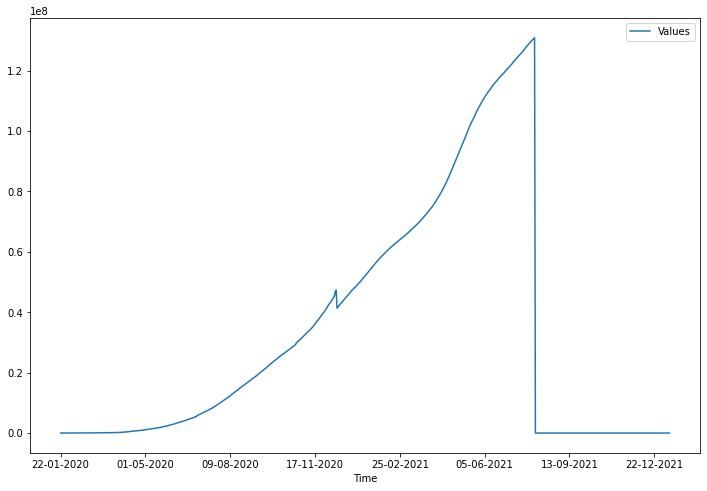

In [23]:
df1.plot(figsize=(12,8))

In [24]:
train = df1.iloc[:600]

In [25]:
test = df1.iloc[601:]

In [26]:
len(test)

118

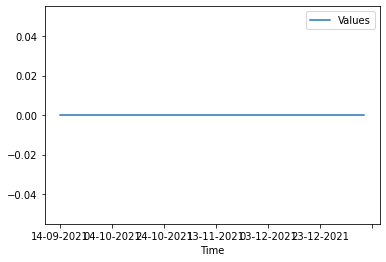

In [27]:
test.plot()

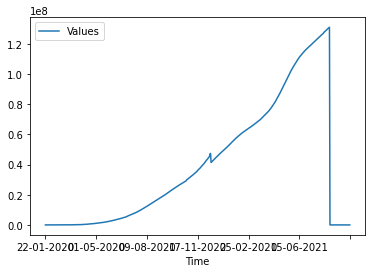

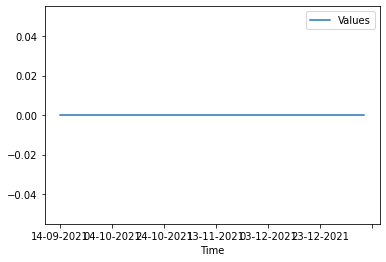

In [28]:
train.plot()
test.plot()

In [29]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [30]:
data = np.array(df1["Values"])

In [31]:
#np.asarray(data)

In [32]:
#data = train["Values"].astype('int')

In [33]:
#df1.index = pd.DatetimeIndex(df1.index).to_period('M')

In [34]:
#test.index = pd.DatetimeIndex(test.index).to_period('M')

In [35]:
#train.index = pd.DatetimeIndex(train.index).to_period('M')

In [39]:
#model = ExponentialSmoothing(train['Values'],trend='mul',seasonal='mul',seasonal_periods=12).fit()

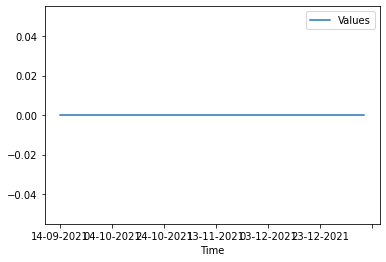

In [41]:
test.plot()
plt.show()
#model.forecast(10).plot()
plt.show()

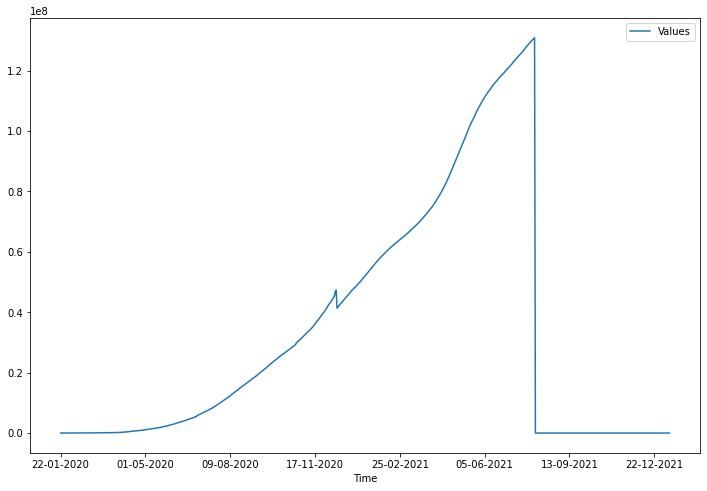

In [42]:
df1.plot(figsize=(12,8))
#test_data = model.forecast(100).plot()
plt.legend()

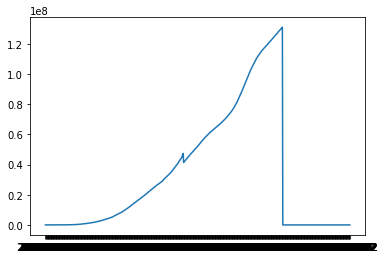

In [43]:
#today = datetime.date.today()
plt.figure()
plt.plot(df1.index,df1['Values'])

In [44]:
SimpleExpSmoothing(df1).fit(smoothing_level=0.1)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [45]:

import plotly.express as px
fig = px.line(df1)
fig.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



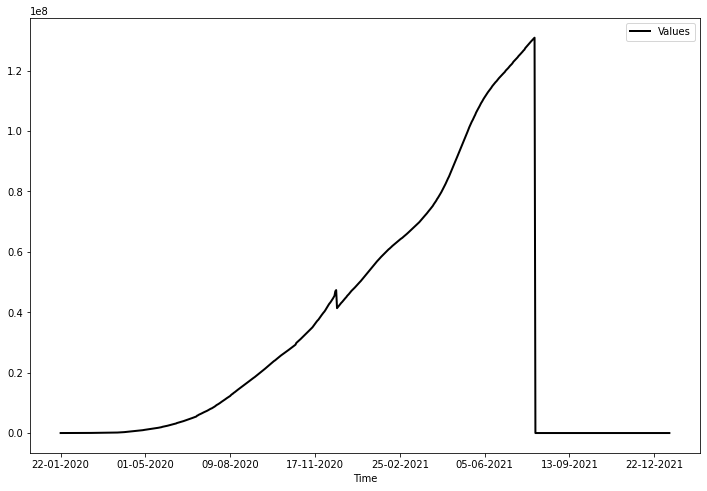

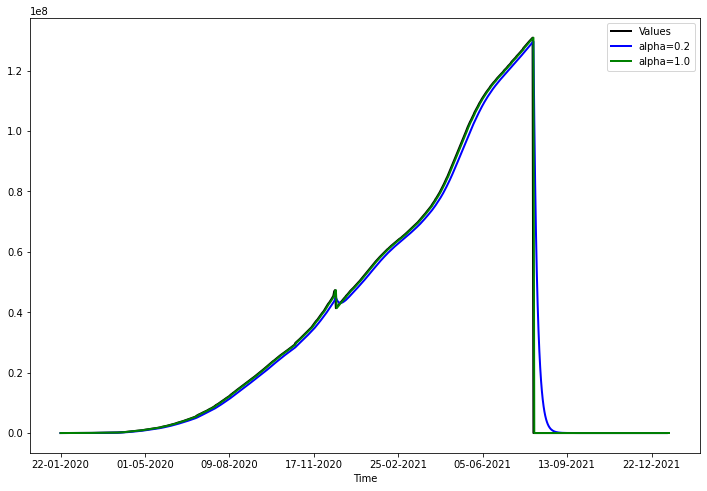

In [46]:
ax = df1.plot( color='black', figsize=(12,8), legend=True,linewidth=2)

#First Instance
ins1 = SimpleExpSmoothing(df1).fit(smoothing_level=0.2,optimized=False)
ins_cast1 = ins1.forecast(3).rename('alpha=0.2')

#Second Instance
#ins2 = SimpleExpSmoothing(df1).fit(smoothing_level=0.8,optimized=False)
#ins_cast2 = ins2.forecast(3).rename('alpha=0.5')

#Third Instance
ins3 = SimpleExpSmoothing(df1).fit()
ins_cast3 = ins3.forecast(3).rename('alpha=%s'%ins3.model.params['smoothing_level'])

#After creating model we will visualize the plot
ax = df1.plot(color='black', figsize=(12,8), legend=True,linewidth=2)

#Plot for alpha =0.2
ins_cast1.plot( ax=ax, color='blue', legend=True,linewidth =2)
ins1.fittedvalues.plot( ax=ax, color='blue',linewidth = 2)

#Plot for alpha = 0.5
#ins_cast2.plot(ax=ax, color='red', legend=True,linewidth = 2)
#ins2.fittedvalues.plot(ax=ax, color='red',linewidth = 2)

#Plot for alpha=Optimized by statsmodel
ins_cast3.plot(ax=ax, color='green', legend=True,linewidth = 2)
ins3.fittedvalues.plot(ax=ax, color='green',linewidth = 2)

plt.show()